In [2]:
!pip install fastai

  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.4
    Uninstalling colorama-0.4.4:
      Successfully uninstalled colorama-0.4.4
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
#importing libraries
from fastai import *
#from fastai.vision import *
from fastai.vision.data import ImageDataLoaders
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path

In [2]:
x  = 'C:\\Users\\Joeri Van Cauwelaert\\Desktop\\Masterthesis\\machineLearning\\AdjustedImages'
path = Path(x)
path.ls()

(#4) [Path('C:/Users/Joeri Van Cauwelaert/Desktop/Masterthesis/machineLearning/AdjustedImages/Sitting'),Path('C:/Users/Joeri Van Cauwelaert/Desktop/Masterthesis/machineLearning/AdjustedImages/SittingPelvicR'),Path('C:/Users/Joeri Van Cauwelaert/Desktop/Masterthesis/machineLearning/AdjustedImages/Standing'),Path('C:/Users/Joeri Van Cauwelaert/Desktop/Masterthesis/machineLearning/AdjustedImages/StandingPelvicR')]

In [3]:
data = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2, 
                                    item_tfms=Resize(460), 
                                    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)],
                                    num_workers=4)

In [4]:
np.random.seed(40)
# Determine the aspect ratio of your images (720x480)
aspect_ratio = 720 / 480

# Choose a target width or height that maintains the aspect ratio
target_width = 224
target_height = int(target_width / aspect_ratio)  # Calculate height based on aspect ratio
data = ImageDataLoaders.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=aug_transforms(), size=(480, 240),
                                  num_workers=4)#.normalize(imagenet_stats)

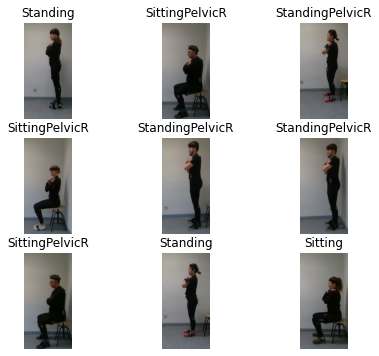

In [5]:
data.show_batch(figsize=(7,6))

In [52]:
data

In [53]:
print(data.classes)
len(data.classes)
data.c

AttributeError: classes

In [6]:
print(torch.cuda.is_available())

False


In [7]:
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

In [8]:
learn = vision_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

TypeError: create_vision_model() got an unexpected keyword argument 'device'

SuggestedLRs(valley=0.0005754399462603033)

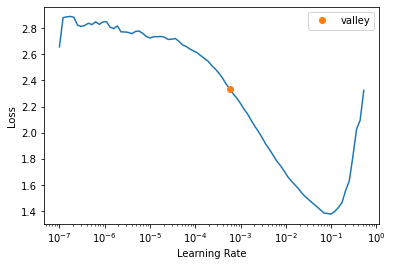

In [8]:
learn.lr_find()
#learn.recorder.plot(suggestions=True)

In [9]:
learn.recorder.plot(suggestions=True)

AttributeError: 'Sequential' object has no attribute 'plot'

In [10]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(40,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 